In [65]:
import pandas as pd
from os import path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches # for drawing shapes

import seaborn as sns; sns.set_theme()

%config InlineBackend.figure_format = 'retina'

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [2]:
files = os.listdir(os.getcwd() + "/OULAD/")

In [3]:
files

['studentAssessment.csv',
 'studentInfo.csv',
 'OULAD.names',
 'studentVle.csv',
 'model.png',
 'adobe_oulad_challenge - Jupyter Notebook_files',
 'adobe_oulad_challenge - Jupyter Notebook.htm',
 'courses.csv',
 'vle.csv',
 'studentRegistration.csv',
 'assessments.csv']

In [4]:
student_assessement = pd.read_csv(os.getcwd() + "/OULAD/studentAssessment.csv")

student_info = pd.read_csv(os.getcwd() + "/OULAD/studentInfo.csv")

student_vle = pd.read_csv(os.getcwd() + "/OULAD/studentVle.csv")

student_registration = pd.read_csv(os.getcwd() + "/OULAD/studentRegistration.csv")

courses = pd.read_csv(os.getcwd() + "/OULAD/courses.csv")

vle = pd.read_csv(os.getcwd() + "/OULAD/vle.csv")

assessments = pd.read_csv(os.getcwd() + "/OULAD/assessments.csv")

In [5]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [6]:
vle.shape

(6364, 6)

In [7]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_site            6364 non-null   int64 
 1   code_module        6364 non-null   object
 2   code_presentation  6364 non-null   object
 3   activity_type      6364 non-null   object
 4   week_from          6364 non-null   object
 5   week_to            6364 non-null   object
dtypes: int64(1), object(5)
memory usage: 298.4+ KB


In [8]:
vle['activity_type'].value_counts()

resource          2660
subpage           1055
oucontent          996
url                886
forumng            194
quiz               127
page               102
oucollaborate       82
questionnaire       61
ouwiki              49
dataplus            28
externalquiz        26
homepage            22
glossary            21
ouelluminate        21
dualpane            20
repeatactivity       5
htmlactivity         4
sharedsubpage        3
folder               2
Name: activity_type, dtype: int64

In [9]:

vle[vle['activity_type']=='resource']['week_from'].value_counts()

?     2512
18      20
1       14
13      13
4       12
14       9
15       7
3        7
2        7
28       7
9        5
27       5
21       4
29       4
5        4
8        4
11       4
23       2
7        2
19       2
24       2
10       2
22       2
6        2
25       2
20       2
26       1
17       1
12       1
16       1
Name: week_from, dtype: int64

In [10]:
courses.sort_values(by='module_presentation_length', ascending=False)

,code_module,code_presentation,module_presentation_length
20,GGG,2014J,269
6,CCC,2014J,269
16,FFF,2014J,269
1,AAA,2014J,269
13,EEE,2014J,269
0,AAA,2013J,268
15,FFF,2013J,268
2,BBB,2013J,268
12,EEE,2013J,268
3,BBB,2014J,262


In [11]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [12]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


In [13]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [14]:
# Number o funique student_ids
print("Number of unique student ids:", len(student_info.id_student.unique()))

Number of unique student ids: 28785


In [15]:
student_info['highest_education'].value_counts()

A Level or Equivalent          14045
Lower Than A Level             13158
HE Qualification                4730
No Formal quals                  347
Post Graduate Qualification      313
Name: highest_education, dtype: int64

In [16]:
student_info.groupby(['age_band', 'highest_education']).size()

age_band  highest_education          
0-35      A Level or Equivalent          10624
          HE Qualification                2612
          Lower Than A Level              9311
          No Formal quals                  294
          Post Graduate Qualification      103
35-55     A Level or Equivalent           3381
          HE Qualification                1986
          Lower Than A Level              3814
          No Formal quals                   53
          Post Graduate Qualification      199
55<=      A Level or Equivalent             40
          HE Qualification                 132
          Lower Than A Level                33
          Post Graduate Qualification       11
dtype: int64

In [17]:
student_info['code_module'].value_counts()

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64

In [18]:
student_assessement.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


In [19]:
student_assessement.shape

(173912, 5)

In [20]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


In [21]:
student_registration.shape

(32593, 5)

In [22]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [23]:
student_vle.shape

(10655280, 6)

#### Analysis plan

3 Hypotheses:
1. Student WIthdrawal rates:

Average XX%

Largest (X%) for course XXX
2. Students Fail rates
3. Continuing education (taking the next course)



- Distribution of outcomes
- Check how many students continue studies (Hypo

- Distribution of withdrawals by student characteristics
- Study vle activities: 
    - At what point do students withdraw
    - What is this vle about
    
    

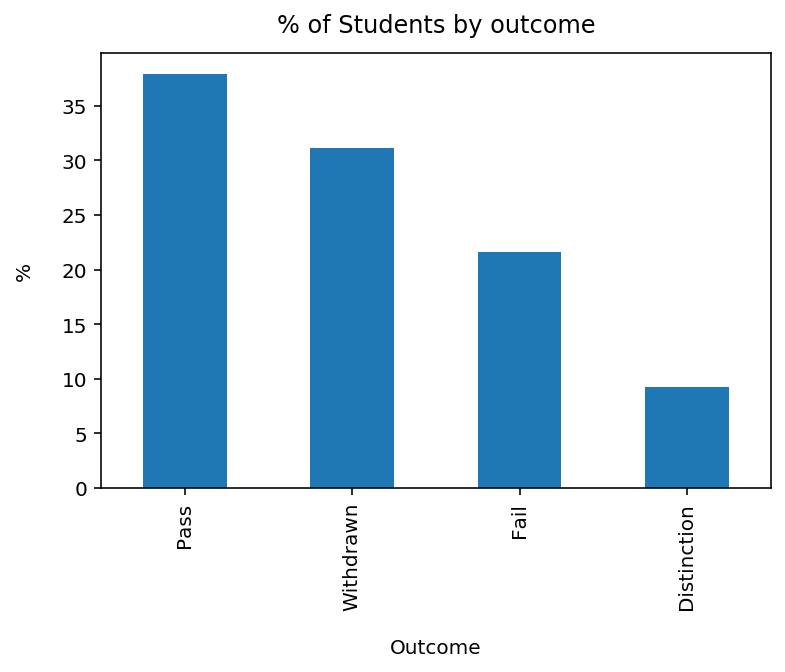

In [24]:
# Diistribution of outcomes
(student_info['final_result'].value_counts(normalize=True)*100).plot(kind= 'bar');
plt.xlabel("Outcome", labelpad=14)
plt.ylabel("%", labelpad=14)
plt.title("% of Students by outcome", y=1.02);


### EDA of Students Information

In [25]:
student_info['final_result'].value_counts(normalize=True)*100

Pass           37.925321
Withdrawn      31.160065
Fail           21.636548
Distinction     9.278066
Name: final_result, dtype: float64

In [26]:
student_registration[student_registration['date_unregistration']!='?'].shape[0]/student_registration.shape[0]*100

30.902340993464854

In [27]:
pd.crosstab(student_info['age_band'], student_info['highest_education'], margins=True, margins_name='subtotal')

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,subtotal
age_band,,,,,,
0-35,10624,2612,9311,294,103,22944
35-55,3381,1986,3814,53,199,9433
55<=,40,132,33,0,11,216
subtotal,14045,4730,13158,347,313,32593


In [28]:
# Final results distribution within each education level
pd.crosstab(student_info['final_result'], student_info['highest_education'], margins=True, margins_name='subtotal', normalize='columns')

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification,subtotal
final_result,,,,,,
Distinction,0.106515,0.147357,0.055252,0.046110,0.281150,0.092781
Fail,0.192738,0.167019,0.260374,0.273775,0.108626,0.216365
Pass,0.413813,0.414376,0.333257,0.250720,0.373802,0.379253
Withdrawn,0.286935,0.271247,0.351117,0.429395,0.236422,0.311601


In [29]:
# Education levels distribution within each final results group
pd.crosstab(student_info['final_result'], student_info['highest_education'], margins=True, margins_name='subtotal', normalize='index')

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
final_result,,,,,
Distinction,0.494709,0.230489,0.240410,0.005291,0.029101
Fail,0.383863,0.112025,0.485820,0.013471,0.004821
Pass,0.470188,0.158563,0.354745,0.007038,0.009465
Withdrawn,0.396810,0.126329,0.454904,0.014671,0.007286
subtotal,0.430921,0.145123,0.403706,0.010646,0.009603


In [30]:
student_info.region.value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [31]:
# Final resuts vs number of previous attempts
pd.crosstab(student_info['final_result'], student_info['num_of_prev_attempts'], \
            margins=True, margins_name='subtotal', normalize='columns')



num_of_prev_attempts,0,1,2,3,4,5,6,subtotal
final_result,,,,,,,,
Distinction,0.100524,0.043346,0.032593,0.007042,0.000000,0.000000,0.25,0.092781
Fail,0.201647,0.305850,0.349630,0.401408,0.307692,0.461538,0.25,0.216365
Pass,0.392245,0.302213,0.251852,0.218310,0.333333,0.153846,0.00,0.379253
Withdrawn,0.305584,0.348590,0.365926,0.373239,0.358974,0.384615,0.50,0.311601


In [127]:
# Otcomes by courses
courses_outcomes = pd.crosstab(student_info['code_module'], student_info['final_result']).reset_index()
courses_outcomes.columns = [col.lower() for col in courses_outcomes.columns ]

In [128]:
courses_outcomes

,code_module,distinction,fail,pass,withdrawn
0,AAA,44,91,487,126
1,BBB,677,1767,3077,2388
2,CCC,498,781,1180,1975
3,DDD,383,1412,2227,2250
4,EEE,356,562,1294,722
5,FFF,670,1711,2978,2403
6,GGG,396,728,1118,292


In [130]:
def get_outcome_rates(df):
    df['total'] = df['distinction'] + df['fail'] + \
                    df['pass'] + df['withdrawn']

    df['withdrawal_rate'] = df['withdrawn']/df['total']
    df['fail_rate'] = df['fail']/df['total']
    df['pass_rate'] = df['pass']/df['total']
    df['distinction_rate'] = df['distinction']/df['total']
    
    return df

In [131]:
get_outcome_rates(courses_outcomes)

,code_module,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
0,AAA,44,91,487,126,748,0.168449,0.121658,0.651070,0.058824
1,BBB,677,1767,3077,2388,7909,0.301935,0.223416,0.389050,0.085599
2,CCC,498,781,1180,1975,4434,0.445422,0.176139,0.266125,0.112314
3,DDD,383,1412,2227,2250,6272,0.358737,0.225128,0.355070,0.061065
4,EEE,356,562,1294,722,2934,0.246080,0.191547,0.441036,0.121336
5,FFF,670,1711,2978,2403,7762,0.309585,0.220433,0.383664,0.086318
6,GGG,396,728,1118,292,2534,0.115233,0.287293,0.441200,0.156275


In [34]:
courses_outcomes['total'] = courses_outcomes['distinction'] + courses_outcomes['fail'] + \
                            courses_outcomes['pass'] + courses_outcomes['withdrawn']

courses_outcomes['withdrawal_rate'] = courses_outcomes['withdrawn']/courses_outcomes['total']
courses_outcomes['fail_rate'] = courses_outcomes['fail']/courses_outcomes['total']
courses_outcomes['pass_rate'] = courses_outcomes['pass']/courses_outcomes['total']
courses_outcomes['distinction_rate'] = courses_outcomes['distinction']/courses_outcomes['total']

In [132]:
courses_outcomes = courses_outcomes.sort_values(by = 'withdrawal_rate', ascending=False)

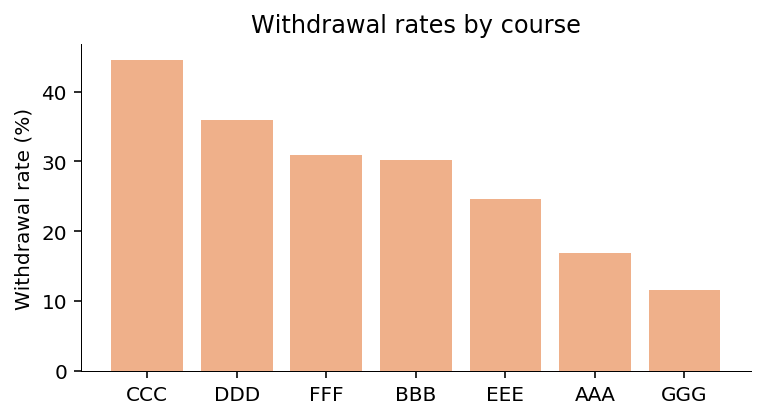

In [133]:
fig, ax = plt.subplots(figsize=(6,3))  # make one subplot (ax) on the figure
ax.bar( courses_outcomes['code_module'], courses_outcomes['withdrawal_rate']*100, color='#EFB08A')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Withdrawal rate (%)")

ax.set_title('Withdrawal rates by course')
plt.show();

In [134]:
# Outcome rates by modules
modules_outcomes = pd.crosstab([student_info['code_module'], student_info['code_presentation']], student_info['final_result']).reset_index()
modules_outcomes.columns = [col.lower() for col in modules_outcomes.columns ]

In [142]:
modules_outcomes = get_outcome_rates(modules_outcomes)

In [143]:
modules_outcomes.sort_values(by='withdrawal_rate', ascending=False)

,code_module,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
6,CCC,2014B,192,375,471,898,1936,0.463843,0.193698,0.243285,0.099174
7,CCC,2014J,306,406,709,1077,2498,0.431145,0.162530,0.283827,0.122498
10,DDD,2014B,119,259,360,490,1228,0.399023,0.210912,0.293160,0.096906
18,FFF,2014J,258,393,859,855,2365,0.361522,0.166173,0.363214,0.109091
11,DDD,2014J,112,364,680,647,1803,0.358846,0.201886,0.377149,0.062119
9,DDD,2013J,98,428,731,681,1938,0.351393,0.220846,0.377193,0.050568
8,DDD,2013B,54,361,456,432,1303,0.331543,0.277053,0.349962,0.041443
5,BBB,2014J,180,391,972,749,2292,0.326789,0.170593,0.424084,0.078534
17,FFF,2014B,107,384,547,462,1500,0.308000,0.256000,0.364667,0.071333
4,BBB,2014B,166,396,561,490,1613,0.303782,0.245505,0.347799,0.102914


In [118]:
modules_outcomes['term']= modules_outcomes['code_presentation'].str.strip().str[-1]

In [69]:
corr_rates = modules_outcomes[['withdrawal_rate', 'fail_rate', 'pass_rate', 'distinction_rate']].corr() ;

In [102]:
modules_outcomes.groupby('code_presentation')['withdrawn', 'fail', 'pass', 'distinction'].mean().reset_index()

<ipython-input-102-1a6b95c4390b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  modules_outcomes.groupby('code_presentation')['withdrawn', 'fail', 'pass', 'distinction'].mean().reset_index()


,code_presentation,withdrawn,fail,pass,distinction
0,2013B,449.333333,413.666667,589.333333,109.000000
1,2013J,394.833333,333.500000,621.000000,124.833333
2,2014B,435.500000,305.500000,429.000000,130.666667
3,2014J,546.571429,282.428571,613.285714,166.285714


In [85]:
# Outcome rates by presentations
presentation_outcomes = pd.crosstab([student_info['code_presentation']], student_info['final_result']).reset_index()
presentation_outcomes.columns = [col.lower() for col in presentation_outcomes.columns ]


In [86]:
presentation_outcomes

,code_presentation,distinction,fail,pass,withdrawn
0,2013B,327,1241,1768,1348
1,2013J,749,2001,3726,2369
2,2014B,784,1833,2574,2613
3,2014J,1164,1977,4293,3826


In [145]:
presentation_outcomes = get_outcome_rates(presentation_outcomes)

In [146]:
presentation_outcomes = presentation_outcomes.sort_values(by='withdrawal_rate', ascending=False)

In [147]:
presentation_outcomes

,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
3,2014J,1164,1977,4293,3826,11260,0.339787,0.175577,0.381261,0.103375
2,2014B,784,1833,2574,2613,7804,0.334828,0.234880,0.329831,0.100461
0,2013B,327,1241,1768,1348,4684,0.287788,0.264944,0.377455,0.069812
1,2013J,749,2001,3726,2369,8845,0.267835,0.226230,0.421255,0.084681


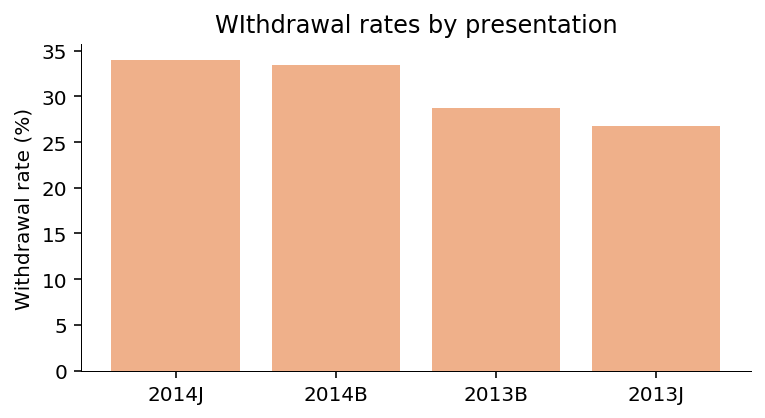

In [148]:
# Withdrawal rates 
fig, ax = plt.subplots(figsize=(6,3))  # make one subplot (ax) on the figure
ax.bar( presentation_outcomes['code_presentation'], presentation_outcomes['withdrawal_rate']*100, color='#EFB08A')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Withdrawal rate (%)")

ax.set_title("WIthdrawal rates by presentation")
#ax.set_xticklabels([f'Cyl-{n}' for n in cyl])
plt.show();

In [123]:
#Outcome reates by term (J or B)

# Outcome rates by presentations
term_outcomes = pd.crosstab(student_info['code_presentation'].str.strip().str[-1], student_info['final_result']).reset_index()
term_outcomes.columns = [col.lower() for col in term_outcomes.columns ]


In [125]:
term_outcomes['total']

,code_presentation,distinction,fail,pass,withdrawn
0,B,1111,3074,4342,3961
1,J,1913,3978,8019,6195


In [141]:
get_outcome_rates(term_outcomes)

,code_presentation,distinction,fail,pass,withdrawn,total,withdrawal_rate,fail_rate,pass_rate,distinction_rate
0,B,1111,3074,4342,3961,12488,0.317184,0.246156,0.347694,0.088965
1,J,1913,3978,8019,6195,20105,0.308132,0.197861,0.398856,0.095150


In [40]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


### COURSE DESIGN EDA

In [107]:
courses.rename(columns = {'module_presentation_length':'course_length'}, inplace=True)

In [110]:
courses.groupby('code_module')['course_length'].mean().sort_values(ascending=False)

code_module
AAA    268.500000
EEE    259.333333
GGG    257.000000
CCC    255.000000
FFF    254.500000
DDD    251.000000
BBB    251.000000
Name: course_length, dtype: float64

In [111]:
courses.sort_values(by='course_length', ascending=False)

,code_module,code_presentation,course_length
20,GGG,2014J,269
6,CCC,2014J,269
16,FFF,2014J,269
1,AAA,2014J,269
13,EEE,2014J,269
0,AAA,2013J,268
15,FFF,2013J,268
2,BBB,2013J,268
12,EEE,2013J,268
3,BBB,2014J,262


In [149]:
courses['term'] = courses['code_presentation'].str.strip().str[-1]

In [189]:
def annotate(ax, space=5):
    '''Add labels at the end of a bar chart'''
    for rect in ax.patches:
            # Get X and Y placement of label from rect.
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            # Number of points between bar and label. Change to your liking.
            space = space
            # Vertical alignment for positive values
            va = 'bottom'

            # If value of bar is negative: Place label below bar
            if y_value < 0:
                # Invert space to place label below
                space *= -1
                # Vertically align label at top
                va = 'top'

            # Use Y value as label and format number with one decimal place
            label = "{:.1f}".format(y_value)

            # Create annotation
            ax.annotate(
                label,                      # Use `label` as label
                (x_value, y_value),         # Place label at end of the bar
                xytext=(0, space),          # Vertically shift label by `space`
                textcoords="offset points", # Interpret `xytext` as offset in points
                ha='center',                # Horizontally center label
                va=va)                      # Vertically align label differently for
                                            # positive and negative values.

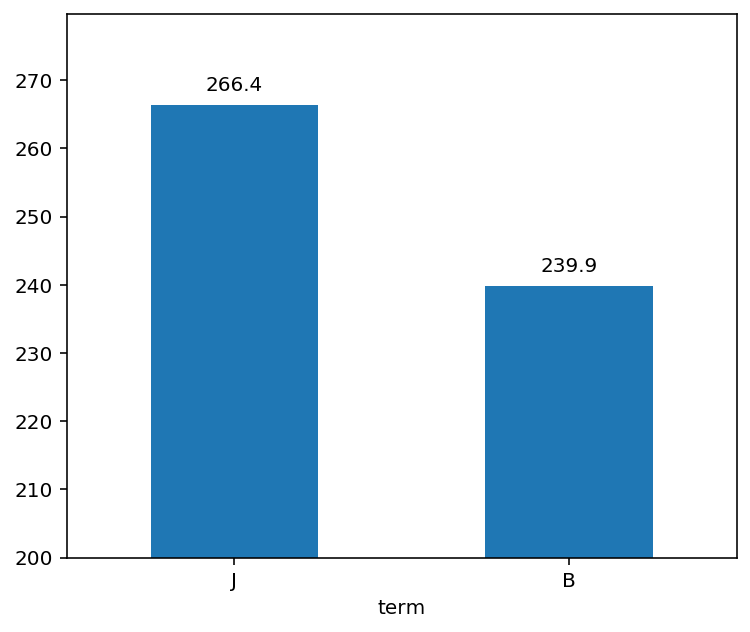

In [190]:
fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure 
courses.groupby('term')['course_length'].mean().sort_values(ascending=False).plot(kind='bar');

labels = courses.groupby('term')['course_length'].mean().sort_values(ascending=False).index
values = np.round(courses.groupby('term')['course_length'].mean().sort_values(ascending=False).values)
ax.set_xticklabels(labels=labels,rotation=0);
plt.ylim(ymin=200)
annotate(ax)

### EDA of Assessment Info

In [41]:
# Join Assessment and Student Assessment

stud_assess = student_assessement.set_index('id_assessment').join(assessments.set_index('id_assessment'), how='left').reset_index()

In [42]:
# Join with student info ('final_result')
stud_assess = stud_assess.set_index(['id_student', 'code_module', 'code_presentation']).\
            join(student_info[['id_student', 'code_module', 'code_presentation', 'final_result']].\
                 set_index(['id_student', 'code_module', 'code_presentation']), how='left').reset_index()

In [43]:
# Join with courses info ('lngth')
stud_assess = stud_assess.set_index(['code_module', 'code_presentation']).\
            join(courses.set_index(['code_module', 'code_presentation']), how='left').reset_index()

In [44]:
stud_assess.shape

(173912, 12)

In [45]:
student_assessement.shape

(173912, 5)

In [46]:
stud_assess.head()

,code_module,code_presentation,id_student,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,final_result,module_presentation_length
0,AAA,2013J,11391,1752,18,0,78,TMA,19,10.0,Pass,268
1,AAA,2013J,11391,1753,53,0,85,TMA,54,20.0,Pass,268
2,AAA,2013J,11391,1754,115,0,80,TMA,117,20.0,Pass,268
3,AAA,2013J,11391,1755,164,0,85,TMA,166,20.0,Pass,268
4,AAA,2013J,11391,1756,212,0,82,TMA,215,30.0,Pass,268


In [47]:
stud_assess.rename(columns={'module_presentation_length':"course_length"}, inplace=True)

In [103]:
stud_assess.head()

,code_module,code_presentation,id_student,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,final_result,course_length,days_to_submission,attempted_before_course,attempted_after_course,attempted_timeline
0,AAA,2013J,11391,1752,18,0,78,TMA,19,10.0,Pass,268,-1,0,0,0
1,AAA,2013J,11391,1753,53,0,85,TMA,54,20.0,Pass,268,-1,0,0,0
2,AAA,2013J,11391,1754,115,0,80,TMA,117,20.0,Pass,268,-2,0,0,0
3,AAA,2013J,11391,1755,164,0,85,TMA,166,20.0,Pass,268,-2,0,0,0
4,AAA,2013J,11391,1756,212,0,82,TMA,215,30.0,Pass,268,-3,0,0,0


##### Assessement Types

__CMA__ - Computer Marked Assignment: c

__TMA__ - Tutor Marked Assignment



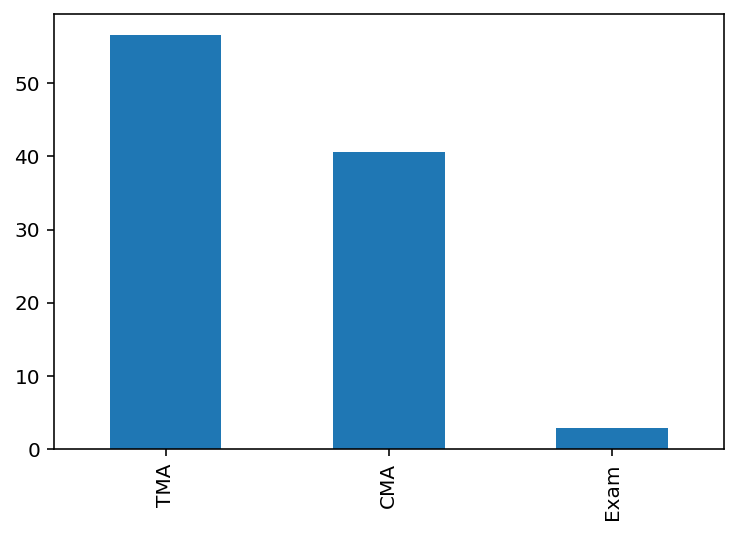

In [49]:
#Distribution of Assessment types
(stud_assess.assessment_type.value_counts(normalize=True)*100).plot(kind='bar');

In [197]:
pd.crosstab(stud_assess['code_module'], stud_assess['assessment_type'], normalize='index')

assessment_type,CMA,Exam,TMA
code_module,,,
AAA,0.000000,0.000000,1.000000
BBB,0.370840,0.000000,0.629160
CCC,0.515628,0.101109,0.383263
DDD,0.170166,0.098626,0.731208
EEE,0.000000,0.000000,1.000000
FFF,0.547150,0.000000,0.452850
GGG,0.628096,0.000000,0.371904


In [50]:
stud_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   code_module        173912 non-null  object 
 1   code_presentation  173912 non-null  object 
 2   id_student         173912 non-null  int64  
 3   id_assessment      173912 non-null  int64  
 4   date_submitted     173912 non-null  int64  
 5   is_banked          173912 non-null  int64  
 6   score              173912 non-null  object 
 7   assessment_type    173912 non-null  object 
 8   date               173912 non-null  object 
 9   weight             173912 non-null  float64
 10  final_result       173912 non-null  object 
 11  course_length      173912 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 15.9+ MB


In [51]:
stud_assess['date'].replace('?', None, inplace=True)

In [52]:
stud_assess['days_to_submission'] = stud_assess['date_submitted'].astype(int) - stud_assess['date'].astype(int)

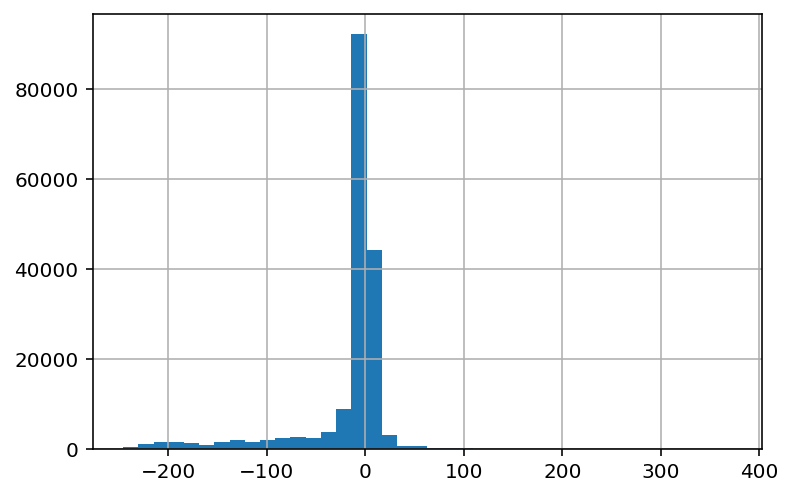

In [53]:
stud_assess['days_to_submission'].hist(bins=40);

In [54]:
stud_assess['days_to_submission'].quantile(0.9996)

176.0

In [55]:
stud_assess['days_to_submission'].quantile(0.001)

-237.0

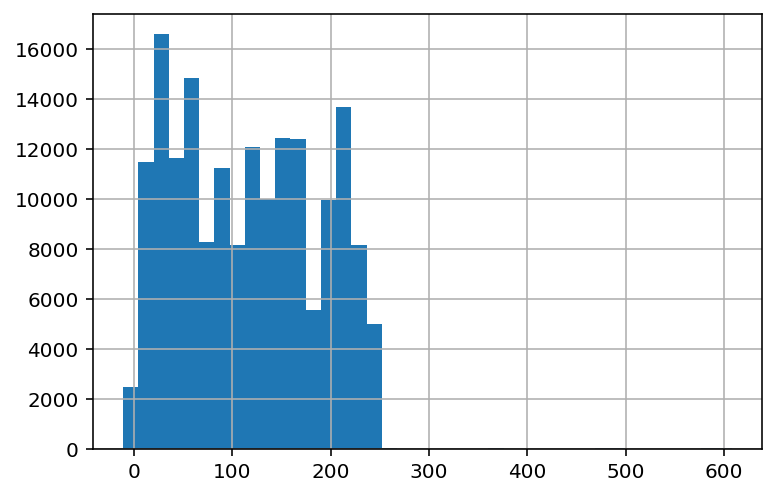

In [56]:
stud_assess['date_submitted'].hist(bins=40);

In [57]:
stud_assess['attempted_before_course'] = 0

stud_assess.loc[stud_assess['date_submitted'] < 0,'attempted_before_course'] = 1

In [58]:
stud_assess['attempted_after_course'] = 0

stud_assess.loc[stud_assess['date_submitted'] > stud_assess['course_length'],'attempted_after_course'] = 1

In [59]:
stud_assess.head()

,code_module,code_presentation,id_student,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,final_result,course_length,days_to_submission,attempted_before_course,attempted_after_course
0,AAA,2013J,11391,1752,18,0,78,TMA,19,10.0,Pass,268,-1,0,0
1,AAA,2013J,11391,1753,53,0,85,TMA,54,20.0,Pass,268,-1,0,0
2,AAA,2013J,11391,1754,115,0,80,TMA,117,20.0,Pass,268,-2,0,0
3,AAA,2013J,11391,1755,164,0,85,TMA,166,20.0,Pass,268,-2,0,0
4,AAA,2013J,11391,1756,212,0,82,TMA,215,30.0,Pass,268,-3,0,0


In [60]:
# Attempted timeline - 0 - within the course time, 1 -before the course started, 2 - after

stud_assess['attempted_timeline'] = stud_assess['attempted_before_course']  + 2*stud_assess['attempted_after_course']

In [61]:
pd.crosstab(stud_assess['final_result'], stud_assess['attempted_timeline'], normalize='columns')

attempted_timeline,0,1,2
final_result,,,
Distinction,0.152617,0.055421,0.011765
Fail,0.160721,0.415654,0.047059
Pass,0.613460,0.309674,0.117647
Withdrawn,0.073203,0.219251,0.823529


##### If assignements were attempted after a course end, there was a big chance of  withdrawing from the course

In [63]:
assessments.date.value_counts()

222    15
229    14
?      11
241     9
236     8
       ..
171     1
102     1
111     1
261     1
144     1
Name: date, Length: 75, dtype: int64

### Assessments 

In [64]:
assessments.groupby('code_module').size()

code_module
AAA    12
BBB    42
CCC    20
DDD    35
EEE    15
FFF    52
GGG    30
dtype: int64

In [208]:
# Courses_assessments

course_assess = courses.set_index(['code_module', 'code_presentation']).\
                join(assessments.set_index(['code_module', 'code_presentation']), how='left').reset_index()


In [233]:
course_assess['date'].replace('?',None, inplace=True)

In [234]:

course_assess['date'] = course_assess['date'].astype(int)

In [235]:
course_assess.sort_values(by=['code_module','date'])

,code_module,code_presentation,course_length,term,id_assessment,assessment_type,date,weight
0,AAA,2013J,268,J,1752,TMA,19,10.0
6,AAA,2014J,269,J,1758,TMA,19,10.0
1,AAA,2013J,268,J,1753,TMA,54,20.0
7,AAA,2014J,269,J,1759,TMA,54,20.0
2,AAA,2013J,268,J,1754,TMA,117,20.0
...,...,...,...,...,...,...,...,...
198,GGG,2014J,269,J,37440,CMA,229,0.0
199,GGG,2014J,269,J,37441,CMA,229,0.0
200,GGG,2014J,269,J,37442,CMA,229,0.0
201,GGG,2014J,269,J,37443,CMA,229,0.0


In [210]:
course_assess['term'] = course_assess['code_presentation'].str.strip().str[-1]

In [219]:
# Variety of assessmnet
course_assess[course_assess['code_presentation'].isin(['2014B', '2014J'])].groupby(['code_module', 'code_presentation'])['id_assessment'].count()

code_module  code_presentation
AAA          2014J                 6
BBB          2014B                12
             2014J                 6
CCC          2014B                10
             2014J                10
DDD          2014B                 7
             2014J                 7
EEE          2014B                 5
             2014J                 5
FFF          2014B                13
             2014J                13
GGG          2014B                10
             2014J                10
Name: id_assessment, dtype: int64

In [222]:
course_assess_2014 = course_assess[course_assess['code_presentation'].isin(['2014B', '2014J'])]

In [228]:
# Distribution of assessments by modules in 2014
pd.crosstab([course_assess_2014['code_module'], course_assess_2014['code_presentation']], \
            course_assess_2014['assessment_type'], normalize='index')

assessment_type                     CMA      Exam       TMA
code_module code_presentation                              
AAA         2014J              0.000000  0.166667  0.833333
BBB         2014B              0.416667  0.083333  0.500000
            2014J              0.000000  0.166667  0.833333
CCC         2014B              0.400000  0.200000  0.400000
            2014J              0.400000  0.200000  0.400000
DDD         2014B              0.000000  0.142857  0.857143
            2014J              0.000000  0.142857  0.857143
EEE         2014B              0.000000  0.200000  0.800000
            2014J              0.000000  0.200000  0.800000
FFF         2014B              0.538462  0.076923  0.384615
            2014J              0.538462  0.076923  0.384615
GGG         2014B              0.600000  0.100000  0.300000
            2014J              0.600000  0.100000  0.300000

In [239]:
course_assess_2013 = course_assess[course_assess['code_presentation'].isin(['2013B', '2013J'])]

# Distribution of assessments by modules in 2013
pd.crosstab([course_assess_2013['code_module'], course_assess_2013['code_presentation']],\
            course_assess_2013['assessment_type'], normalize='index')


### EDA of VLE and S

In [81]:
student_info['final_result'].value_counts()


Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [82]:
student_registration[student_registration['date_unregistration']!='?'].shape[0]

10072

In [87]:
student_registration[student_registration['date_unregistration']=='0'].shape[0]

419

In [91]:
# Fixing NaNs: replacing '?' with NaNs
student_registration['date_unregistration'].replace('?', np.nan, inplace=True)

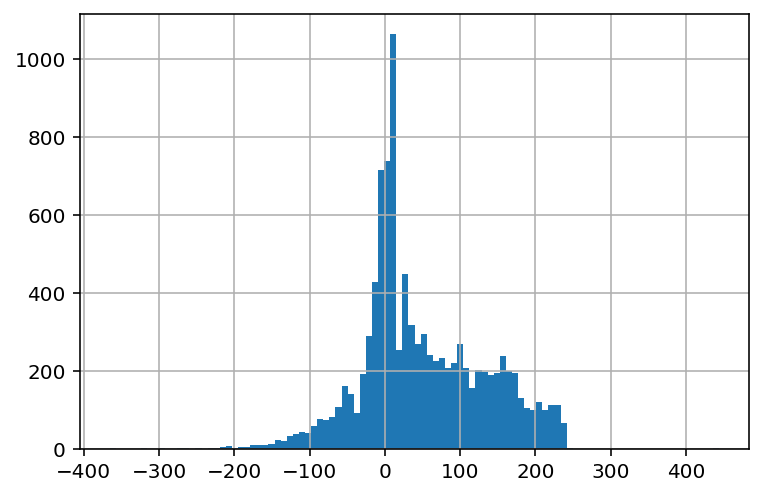

In [103]:
# Students who withdrew
student_registration['date_unregistration'][student_registration['date_unregistration'].isnull()==False].\
astype(int).hist(bins=100);

In [104]:
student_registration.shape

(32593, 5)

In [111]:
#Courses with highest withdrawal rates
student_info[student_info['final_result']=='Withdrawn'].groupby(['code_module']).size().sort_values(ascending=False)

code_module
FFF    2403
BBB    2388
DDD    2250
CCC    1975
EEE     722
GGG     292
AAA     126
dtype: int64

In [120]:

course_withdraws = student_info[student_info['final_result']=='Withdrawn'].\
groupby(['code_module']).size().sort_values(ascending=False).reset_index()

In [123]:
course_withdraws.columns = ['code_module', 'students_withdrew']

In [125]:
course_withdraws

,code_module,students_withdrew
0,FFF,2403
1,BBB,2388
2,DDD,2250
3,CCC,1975
4,EEE,722
5,GGG,292
6,AAA,126


In [112]:
student_info.groupby('code_module').size()

code_module
AAA     748
BBB    7909
CCC    4434
DDD    6272
EEE    2934
FFF    7762
GGG    2534
dtype: int64

In [116]:
courses_stud_ct = student_registration.groupby('code_module').size().reset_index()

In [117]:
courses_stud_ct.columns=['code_module', 'total_students']

In [118]:
courses_stud_ct

,code_module,total_students
0,AAA,748
1,BBB,7909
2,CCC,4434
3,DDD,6272
4,EEE,2934
5,FFF,7762
6,GGG,2534


In [129]:
withdrawal_rates = courses_stud_ct.set_index('code_module').join(course_withdraws.set_index('code_module')).reset_index()

In [131]:
withdrawal_rates['withdrawal_rate'] = withdrawal_rates['students_withdrew']/withdrawal_rates['total_students']

In [135]:

withdrawal_rates.sort_values(by=['withdrawal_rate', 'total_students'], ascending=False)

,code_module,total_students,students_withdrew,withdrawal_rate
2,CCC,4434,1975,0.445422
3,DDD,6272,2250,0.358737
5,FFF,7762,2403,0.309585
1,BBB,7909,2388,0.301935
4,EEE,2934,722,0.246080
0,AAA,748,126,0.168449
6,GGG,2534,292,0.115233


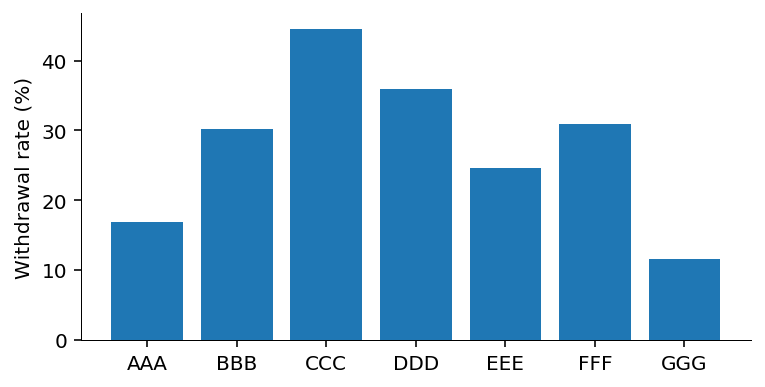

In [136]:
fig, ax = plt.subplots(figsize=(6,3))  # make one subplot (ax) on the figure
ax.bar( withdrawal_rates['code_module'], withdrawal_rates['withdrawal_rate']*100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.set_ylabel("Withdrawal rate (%)")

#ax.set_xticks(cyl)                     # make sure we have a ticket for every cyl value
#ax.set_xticklabels([f'Cyl-{n}' for n in cyl])
plt.show();

In [139]:
student_registration.groupby(['code_module', 'code_presentation']).size().reset_index()

,code_module,code_presentation,0
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


In [137]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [160]:
module_presentation_withdrawal = student_info[student_info['final_result']=='Withdrawn'].\
groupby(['code_module', 'code_presentation']).size().sort_values(ascending=False).\
reset_index().set_index(['code_module', 'code_presentation']).reset_index().rename(columns={0:'withdrew'})



In [161]:
module_presentation_withdrawal

,code_module,code_presentation,withdrew
0,CCC,2014J,1077
1,CCC,2014B,898
2,FFF,2014J,855
3,BBB,2014J,749
4,DDD,2013J,681
5,FFF,2013J,675
6,DDD,2014J,647
7,BBB,2013J,644
8,BBB,2013B,505
9,DDD,2014B,490


In [164]:
module_presentation_students = student_registration.groupby(['code_module', 'code_presentation']).size().reset_index().\
     set_index(['code_module', 'code_presentation']).rename(columns={0:'total_student'}).reset_index()

In [ ]:

module_presentation_withdrawal.join(student_registration.groupby(['code_module', 'code_presentation']).size().reset_index().\
     set_index(['code_module', 'code_presentation']), lsuffix='withdraw', rsuffix='total')